<a href="https://colab.research.google.com/github/relfarizi/Portfolio-Saham/blob/master/Portfolio_Saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portofolio Saham
Buat portofolio minimal terdiri dari 5 buah saham. Portofolio dibangun berdasarjan data historis saham mingguan (weekly). Minimal data yang digunakan adalah 2 tahun (2017 sampai 2018)

## Load Data

### Data Saham

In [58]:
import pandas as pd
import regex as re
"""
kode_saham = ["AAPL","BA","BATA.JK","BKRKF","CSCO","IBM",
              "TLKMF","AKPI.JK","INTC","MSFT","NVDA",
              "ORCL","PBCRF","PHJMF","PTAIF","SPR"]
"""

#fix 
"""
kode_saham = ["BKRKF",
              "TLKMF",
              "PHJMF"]

"""
# variansi besar
#kode_saham = ["AAPL","BA","BATA.JK","AKPI.JK","INTC","MSFT","NVDA","ORCL","CSCO","IBM","SPR"]

#kode_saham = ["BATA.JK","AKPI.JK"]

kode_saham =["SGRO.JK","TLKM.JK","INDR.JK","PRDA.JK","AKPI.JK"]
#kode_saham =["SGRO.JK","PHJMF"]
kode_tmp = []
sama = False
for i in kode_saham :
  if i in kode_tmp :
    sama =  True
    kodenya = i
    break
  else :
      kode_tmp.append(i)

if sama :
  dataset = []
  print("ada yang sama", kodenya)
else :
  n = len(kode_saham)
  github = "https://raw.githubusercontent.com/relfarizi/Portfolio-Saham/master/Data/"

  df = []
  for i in range(n) :
    datas = pd.read_csv(github+kode_saham[i]+".csv")

    if re.findall("adsad",kode_saham[i]):
      tmp = datas["Close"].tolist()
      data_tmp = convert_to_dollar(tmp)
    else :
      data_tmp =datas["Close"]
    df.append(pd.DataFrame(data_tmp))
    #print(data_tmp.shape)
  dataset = pd.concat(df, axis=1, sort=False)
  dataset = dataset.dropna()
  dataset.columns = kode_saham
dataset

,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK
0,1900.0,4000.0,755.0,5725.0,885.0
1,1900.0,3950.0,755.0,5725.0,900.0
2,1925.0,3830.0,755.0,5500.0,990.0
3,1990.0,3890.0,730.0,5650.0,835.0
4,2000.0,3950.0,810.0,5525.0,800.0
...,...,...,...,...,...
100,2340.0,3670.0,6500.0,2060.0,720.0
101,2390.0,3730.0,6500.0,2240.0,750.0
102,2430.0,3760.0,6275.0,2300.0,700.0
103,2370.0,3750.0,5925.0,2280.0,700.0


### Korelasi Saham

In [59]:
rho = dataset.corr().values
dataset.corr()

,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK
SGRO.JK,1.000000,-0.336531,0.282667,-0.599204,-0.559313
TLKM.JK,-0.336531,1.000000,-0.647548,0.348964,0.244041
INDR.JK,0.282667,-0.647548,1.000000,-0.715454,-0.019710
PRDA.JK,-0.599204,0.348964,-0.715454,1.000000,0.189698
AKPI.JK,-0.559313,0.244041,-0.019710,0.189698,1.000000


### Return Saham

In [0]:
import math
def find_ud(saham) :
  K = []
  
  
  for i in range(len(saham)-1) :
    x = (saham[i+1]-saham[i])/saham[i]
    K.append(x)
  up = []
  down = []

  for i in K :
    if i > 0 :
      x = 1
      y = 0
    else :
      x = 0
      y = 1
    up.append(x)
    down.append(y)
  
  x_up = 1
  x_down = 1

  sum_u = 0
  sum_d = 0

  for i in range(len(K)) :
    x_up += K[i]*up[i]
    sum_u += up[i]
    x_down += K[i]*down[i]
    sum_d += down[i]
  
  u = x_up/sum_u
  d = x_up/sum_d

  p = sum_u/(sum_u+sum_d)
  q = 1-p

  result = {"u" : u, "d" : d,"p":p,"q":q}
  
  return result

#### Ekspektasi Return Saham

In [0]:
def EK(df_saham) :
  result = {}
  for saham in df_saham :
    x = find_ud(df_saham[saham])
    exp = (x["u"]*x["p"])+(x["d"]*x["q"])
    result[saham] = exp
  return result

In [0]:
def EK2(df_saham):
  result = {}
  for saham in df_saham :
    x = find_ud(df_saham[saham])
    exp = (pow(x["u"],2)*x["p"])+(pow(x["d"],2)*x["q"])
    result[saham] = exp
  return result

In [63]:
return_ = EK(dataset)
m = []
for saham in return_ :
  m.append(return_[saham])
m

[0.03296868134461746,
 0.04091493697375856,
 0.12227147663783494,
 0.039590996618599605,
 0.07927717244725418]

### Variansi Return Saham

In [64]:
def var(df_saham):
  var = []
  x = EK2(df_saham)
  y = EK(df_saham)
  result = []
  for saham in df_saham :
    tmp = x[saham] - pow(y[saham],2)
    result.append(tmp) 

  return result

var =var(dataset)
df_var = pd.DataFrame([var])
df_var.columns = kode_saham
df_var

,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK
0,0.00001,0.00001,0.0007,0.000213,0.001529



## Multi sekuritas


In [0]:
import numpy as np

std_dev = []
for i in var :
  std_dev.append(np.sqrt(i))
n = len(std_dev)
u = np.ones(n)

#### Matrix C

In [0]:
C = (np.zeros((n,n)))

for i in range(n):
  for j in range(n) :
    C[i][j] = std_dev[i]*rho[i][j]*std_dev[j]
#print(C)

#### Mencari nilai Bobot (w)

In [67]:
from numpy.linalg import inv
from numpy.linalg import det
u = np.ones(n)
uT = np.transpose(u)

CInv = inv(C)

w = np.dot(u,CInv)/(u.dot(CInv).dot(uT))
print(w)

wT = np.transpose(w)
x = np.dot(u,wT)
print("jumlah w = ",x)

[0.4367525  0.3915877  0.05916053 0.10632968 0.00616958]
jumlah w =  1.0


#### Risiko Minimum Portfolio

In [68]:
risk = w.dot(C).dot(wT)
print(round(risk,6))

1e-06


Expected return saham


In [69]:

import pandas as pd

m = np.array(m)
#print(m)
EK = m.dot(wT)
print("ekspektasi return = ", EK)

portfolio=[round(x,4) for x in w]
portfolio.append(EK)
portfolio.append(risk)
#print(portfolio)

df_port = pd.DataFrame([portfolio])
column = kode_saham
#print(kode_saham)
column.append("Expected Return")
column.append("Risiko")
df_port.columns = column
df_port

ekspektasi return =  0.04235339064167913


,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK,Expected Return,Risiko
0,0.4368,0.3916,0.0592,0.1063,0.0062,0.042353,0.000001


In [0]:
mT = np.transpose(m)
e_r = EK
w_new = []
list_EK = []
for i in range(4) :
  e_r *= 1.5
  list_EK.append(e_r)
  
  matA = np.dot(u,(CInv))
  matB = np.dot(m,(CInv))
  mat1 = u.dot(CInv).dot(mT)
  mat2 = m.dot(CInv).dot(mT)
  mat3 = u.dot(CInv).dot(uT)
  mat4 = m.dot(CInv).dot(uT)

  A1 = np.array([[1,mat1],[e_r,mat2]]) 
  A2 = np.array([[mat3,1],[mat4,e_r]])
  A3 = np.array([[mat3,mat1],[mat4,mat2]])

  det1 = det([[1,mat1],[e_r,mat2]])
  det2 = det([[mat3,1],[mat4,e_r]])
  det3 = det([[mat3,mat1],[mat4,mat2]])
  w = ((det1*matA)+(det2*matB))/det3
  w_new.append(w)
#print(w_new)
#print(list_EK)

In [78]:
list_bobot = []
i = 0
for bobot in w_new :
  tmp = []
  wT = np.transpose(bobot)
  risk = bobot.dot(C).dot(wT)
  for x in bobot :
    tmp.append(x)
  tmp.append(list_EK[i])
  tmp.append(risk)
  list_bobot.append(tmp)
  i+=1
print(list_bobot)

df = pd.DataFrame(list_bobot)
df.columns = column
df_tmp =df_port
new_df = df_tmp.append(df,ignore_index=True)
new_df

[[-0.4405408962812911, 1.0103516837733697, 0.25450042263910677, 0.2099116347242398, -0.03422284485539286, 0.06353008596251869, 1.5590775207607807e-05], [-1.756480996578454, 1.9384976523571291, 0.5475102589203346, 0.36528456112802976, -0.09481147582707143, 0.09529512894377803, 9.155801151233651e-05], [-3.7303911470241746, 3.3307166052327966, 0.9870250133421796, 0.5983439507337183, -0.18569442228458913, 0.14294269341566707, 0.0003275990671734581], [-6.691256372692603, 5.419045034546433, 1.64629714497497, 0.9479330351422962, -0.32201884197086333, 0.2144140401235006, 0.0009563636033742077]]


,SGRO.JK,TLKM.JK,INDR.JK,PRDA.JK,AKPI.JK,Expected Return,Risiko
0,0.436800,0.391600,0.059200,0.106300,0.006200,0.042353,0.000001
1,-0.440541,1.010352,0.254500,0.209912,-0.034223,0.063530,0.000016
2,-1.756481,1.938498,0.547510,0.365285,-0.094811,0.095295,0.000092
3,-3.730391,3.330717,0.987025,0.598344,-0.185694,0.142943,0.000328
4,-6.691256,5.419045,1.646297,0.947933,-0.322019,0.214414,0.000956


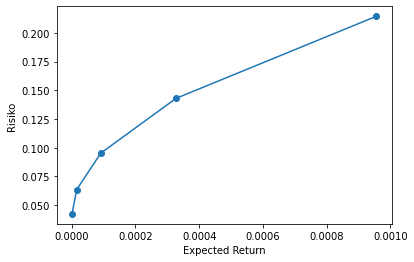

In [79]:
import matplotlib.pyplot as plt

y = new_df["Expected Return"]
x = new_df["Risiko"]

plt.plot(x,y)
plt.scatter(x,y)
plt.xlabel("Expected Return")
plt.ylabel("Risiko")
plt.show()

## Salah


In [73]:
"""import numpy as np
#print(type(dataset.corr()))
list_corr = []
for x in dataset:
  print(type(dataset.corr()[x]))
  #print(dataset[x].corr())
  #list_corr.append(dataset[x].corr().tolist())
  #print(dataset.corr()[x].tolist())
#rho = np.array(list_corr)
#print(rho)"""

'import numpy as np\n#print(type(dataset.corr()))\nlist_corr = []\nfor x in dataset:\n  print(type(dataset.corr()[x]))\n  #print(dataset[x].corr())\n  #list_corr.append(dataset[x].corr().tolist())\n  #print(dataset.corr()[x].tolist())\n#rho = np.array(list_corr)\n#print(rho)'

In [74]:
"""import statistics as st
var = []
for x in kode_saham :
  tmp = dataset[x].tolist()
  #print(tmp)
  var.append(st.variance(tmp))
#print(var)
df_var = pd.DataFrame([var])
df_var.columns = kode_saham
df_var"""

'import statistics as st\nvar = []\nfor x in kode_saham :\n  tmp = dataset[x].tolist()\n  #print(tmp)\n  var.append(st.variance(tmp))\n#print(var)\ndf_var = pd.DataFrame([var])\ndf_var.columns = kode_saham\ndf_var'

In [0]:
def convert_to_dollar(saham) :
  usd = 15589
  dollar = []
  for x in saham :
    dollar.append(x/usd)
  return dollar


In [76]:


def is_short_selling(rho,std_dev):
  n = len(rho)
  print(n)
  check = False
  #rho = rho.sort()
  #std_Dev =std_dev.sort()
  sahamnya = []
  for i in range(n):
    for j in range(n):
      if i < j :
        x = std_dev[i]/std_dev[j]
        #print(rho[i][j])
        if rho[i][j] > x :
          check =True
          sahamnya.append([kode_saham[i],kode_saham[j]])
    
  return [check,sahamnya]

if(is_short_selling(rho,std_dev)[0]) :
  short = {}
  list_short = is_short_selling(rho,std_dev)[1]
  print(list_short)
  for i in list_short :
    x = i[0]
    y = i[1]
    if x not in short.keys():
      short[x] =1
    else :
      short[x] += 1
    
    if y not in short.keys():
      short[y] = 1
    else :
      short[y] += 1
  print(short)
else :
  print("aman")
  print(kode_saham)

5
5
[['SGRO.JK', 'INDR.JK'], ['TLKM.JK', 'PRDA.JK'], ['TLKM.JK', 'AKPI.JK']]
{'SGRO.JK': 1, 'INDR.JK': 1, 'TLKM.JK': 2, 'PRDA.JK': 1, 'AKPI.JK': 1}
